# Exploratory Data Analysis
## Step 01: Read the Dataset

In [48]:
# import relevant libraries
import pandas as pd
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
train_df = pd.read_csv("../dataset/train.csv")

In [50]:
# drop id column
train_df = train_df.drop('id', axis=1)

## Step 02: Basic Data Overview
- Display the first few rows, shape, info, and summary statistics.

In [51]:
train_df.shape

(750000, 17)

In [52]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [53]:
print(train_df['poutcome'].value_counts(normalize=True))

poutcome
unknown    0.896600
failure    0.060153
success    0.023588
other      0.019659
Name: proportion, dtype: float64


In [54]:
train_df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 97.3+ MB


## Step 03: Missing Values Analysis
- Check for missing values in each column and visualize if needed.

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if missing_values.values.any():
    plt.figure(figsize=(12,6))
    sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("No missing values found.")

No missing values found.


## Step 04: Data Types and Column Segregation
- List all columns and their data types.
- Separate columns into numeric and categorical types.

In [58]:
# columns as their data types
columns = list(train_df.columns)
numeric_columns = []
categorical_columns = []
for column in columns:
    dtype = train_df[column].dtype
    # code for separting numeric and object dtype columns
    if dtype in ['int64','float64']:
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

# let's see
print("Numeric Columns:", len(numeric_columns))
print(numeric_columns)
print("\nCategorical Columns:",len(categorical_columns))
print(categorical_columns)

Numeric Columns: 8
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

Categorical Columns: 9
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


## Step 05: Unique Values and Cardinality
- For categorical columns, check the number of unique values.
- For numeric columns, check for discrete vs. continuous features.

In [59]:
# for categorical columns
for category in categorical_columns:
    value_counts = train_df[category].value_counts(dropna=False)
    print(value_counts)
    print("Uniques:",len(value_counts))
    print()

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64
Uniques: 12

marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64
Uniques: 3

education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64
Uniques: 4

default
no     737151
yes     12849
Name: count, dtype: int64
Uniques: 2

housing
yes    411288
no     338712
Name: count, dtype: int64
Uniques: 2

loan
no     645023
yes    104977
Name: count, dtype: int64
Uniques: 2

contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64
Uniques: 3

month
may    228411
aug    128859
jul    110647
jun     93670
nov     66062
apr     41319
feb     37611
jan     1

In [60]:
# for numerical columns
discrete_columns = []
continuous_columsn = []
for col in numeric_columns:
    dtype = train_df[col].dtype
    is_discrete = train_df[col].nunique() < 100
    if is_discrete:
        discrete_columns.append(col)
    else:
        continuous_columsn.append(col)
    print(f"{col}: {'Discrete' if is_discrete else 'Continuous'}")

print("\nDiscrete Columns:", discrete_columns)
print("\nContinuous Columns:", continuous_columsn)

age: Discrete
balance: Continuous
day: Discrete
duration: Continuous
campaign: Discrete
pdays: Continuous
previous: Discrete
y: Discrete

Discrete Columns: ['age', 'day', 'campaign', 'previous', 'y']

Continuous Columns: ['balance', 'duration', 'pdays']


In [61]:
# number of uniques
for d_col in discrete_columns:
    print(train_df[d_col].nunique(),"uniques in",d_col)

78 uniques in age
31 uniques in day
52 uniques in campaign
50 uniques in previous
2 uniques in y


## Step 06: Target Variable Analysis
- Analyze the distribution of the target variable (if present).

In [62]:
print(train_df['y'].describe())
print(train_df['y'].value_counts(normalize=True))

count    750000.000000
mean          0.120651
std           0.325721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: y, dtype: float64
y
0    0.879349
1    0.120651
Name: proportion, dtype: float64


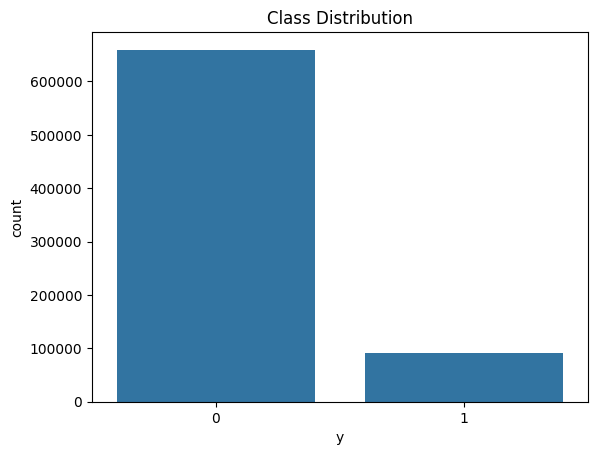

In [63]:
sns.countplot(x=train_df['y'])
plt.title("Class Distribution")  
plt.show()

## Step 07: Univariate Analysis
- Plot histograms for numeric columns.
- Plot bar charts for categorical columns.

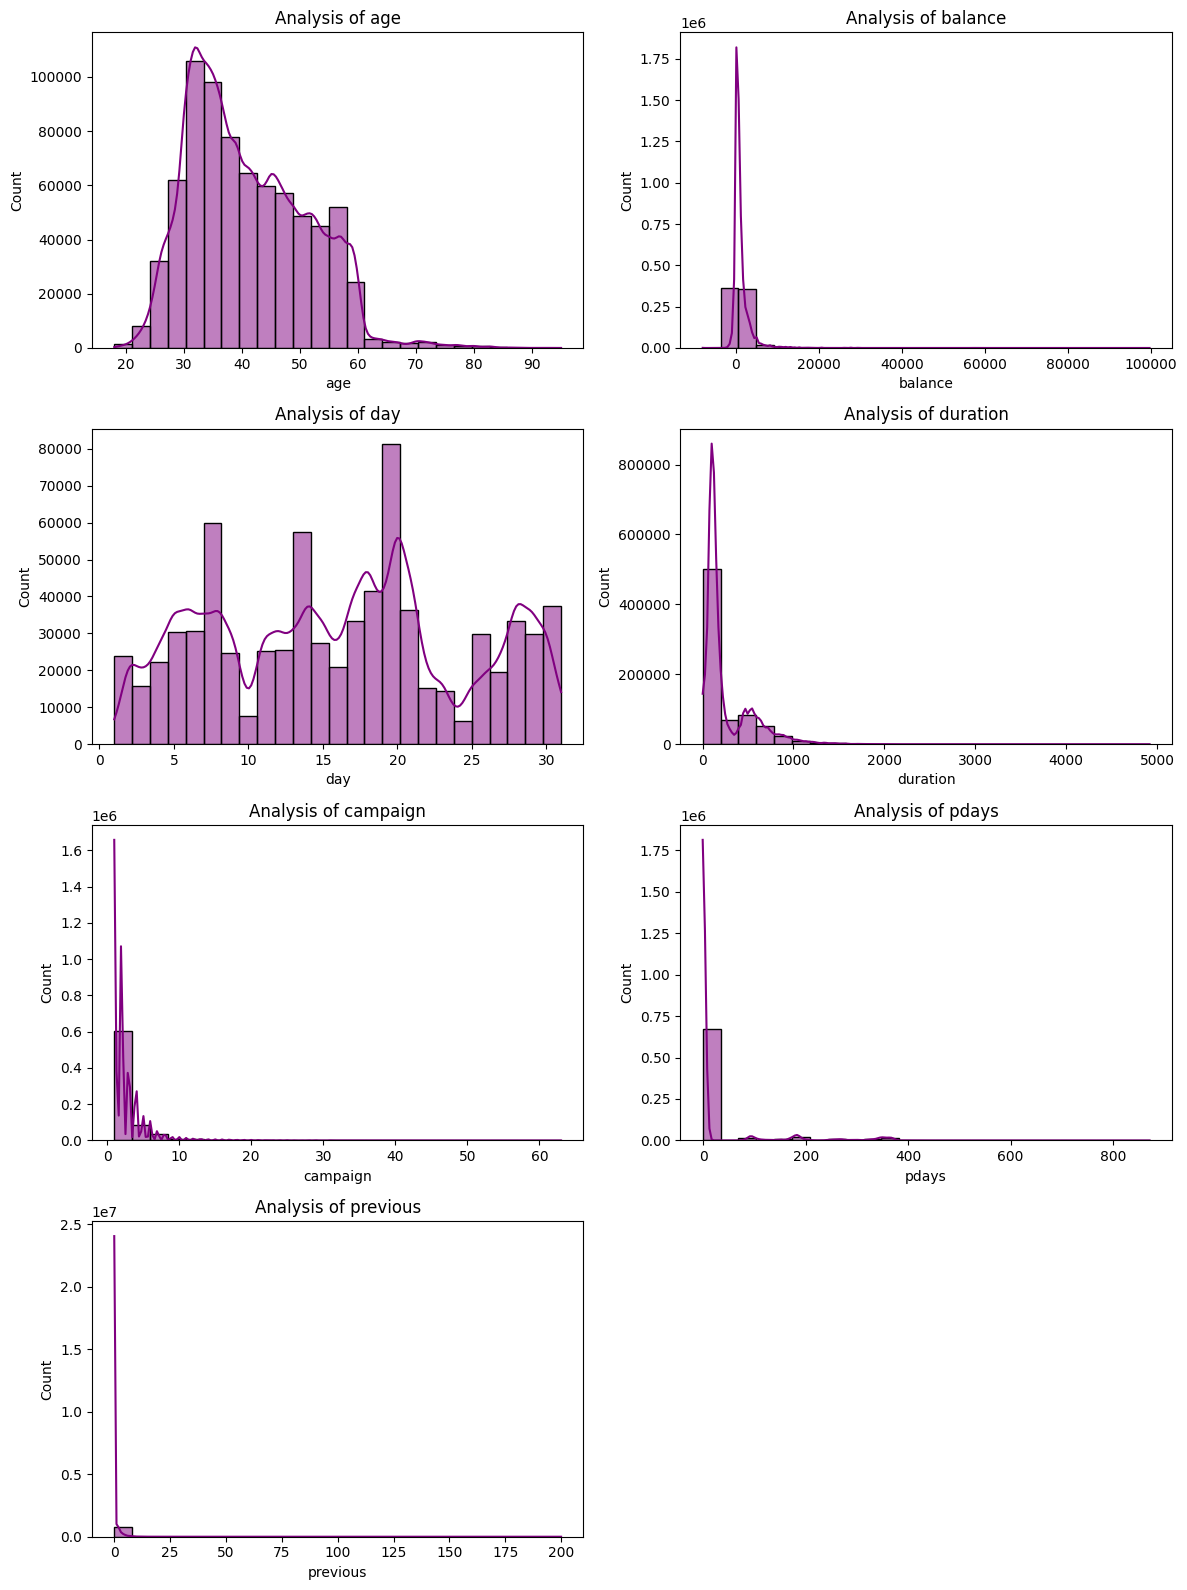

In [64]:
# histogram for numeric columns
num_plots = len([col for col in numeric_columns if col != 'y'])
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), squeeze=False)  # Create subplot grid

axes = axes.flatten()
plot_idx = 0
for num_cols in numeric_columns:
    if num_cols == 'y':
        continue
    sns.histplot(data=train_df, x=num_cols, bins=25, kde=True, color='purple', ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Analysis of {num_cols}")
    plt.xlabel(num_cols)
    plt.ylabel("Count")
    plot_idx += 1

for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

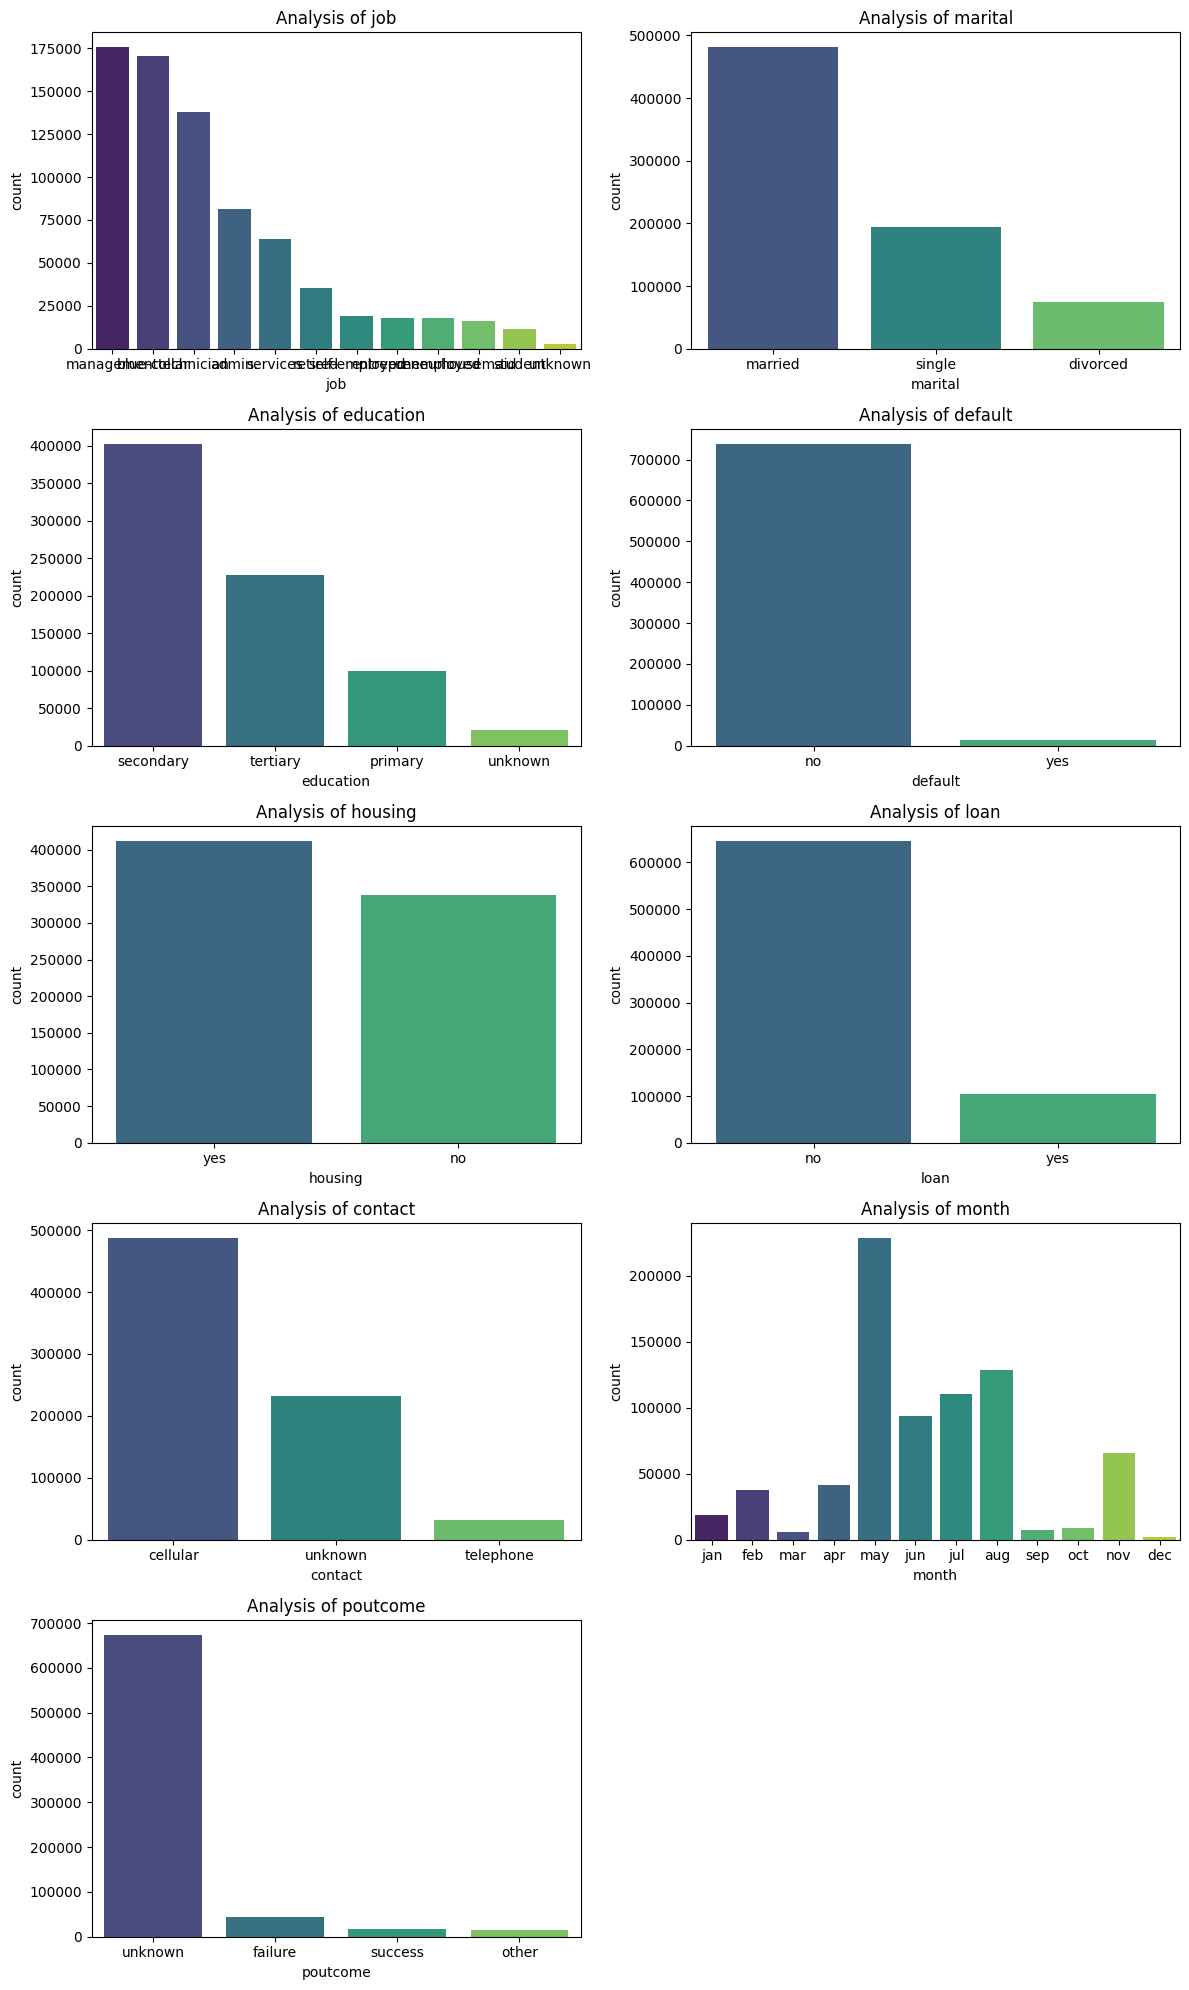

In [65]:
# bar charts for categorical columns
num_plots = len(categorical_columns)
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), squeeze=False)  # Create subplot grid

axes = axes.flatten()
plot_idx = 0
for cat_cols in categorical_columns:
    if cat_cols == 'month':
        month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        sns.countplot(data=train_df, x='month', order=month_order, palette='viridis', ax=axes[plot_idx])
    else:
        sns.countplot(data=train_df, x=cat_cols, order=train_df[cat_cols].value_counts().index, palette='viridis', ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Analysis of {cat_cols}")
    plt.xlabel(cat_cols)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plot_idx += 1

for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Step 08: Bivariate Analysis
- Analyze relationships between features and the target variable.

### For Numerical Features
#### Density Plot (KDE + histogram)

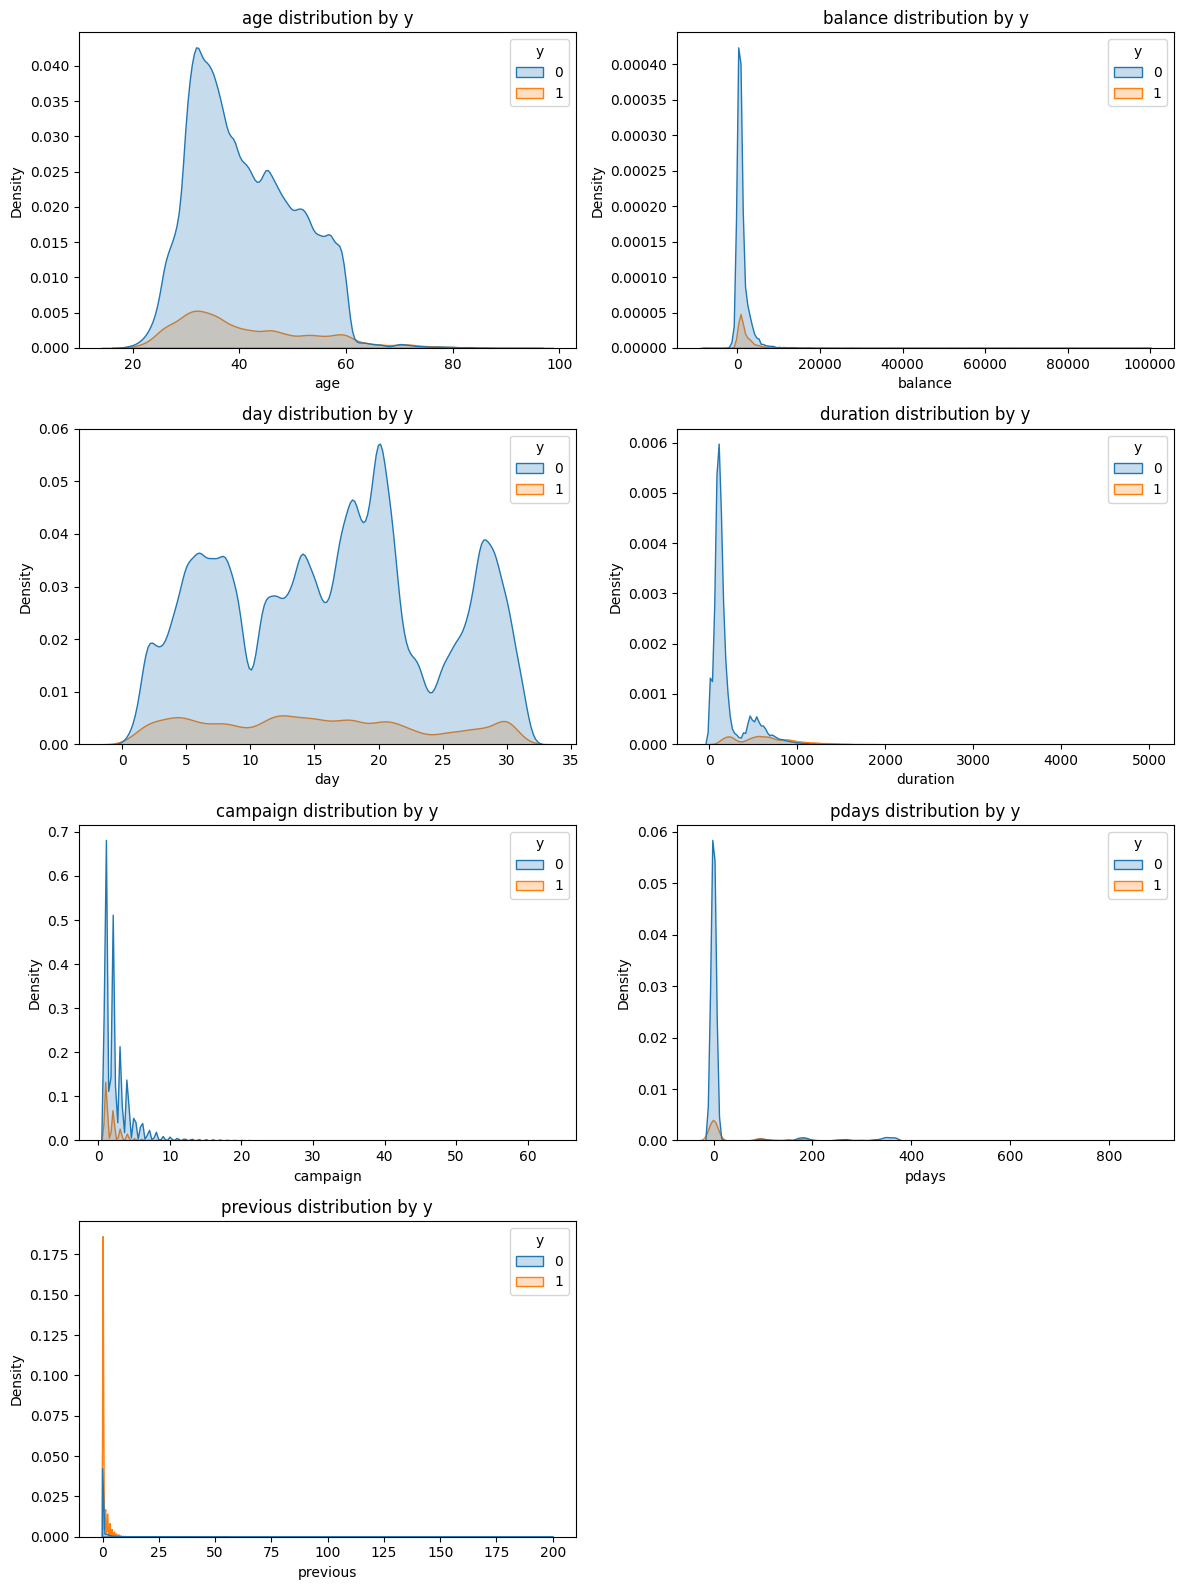

In [66]:
# density plot (KDE + histogram)
num_plots = len([col for col in numeric_columns if col != 'y'])
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), squeeze=False)  # Create subplot grid

axes = axes.flatten()
plot_idx = 0
for num_cols in numeric_columns:
    if num_cols == 'y':
        continue
    sns.kdeplot(data=train_df, x=num_cols, hue='y', fill=True, common_norm=True, ax=axes[plot_idx])
    axes[plot_idx].set_title(f"{num_cols} distribution by y")
    plot_idx += 1

# remove empty subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### For Categorical Features

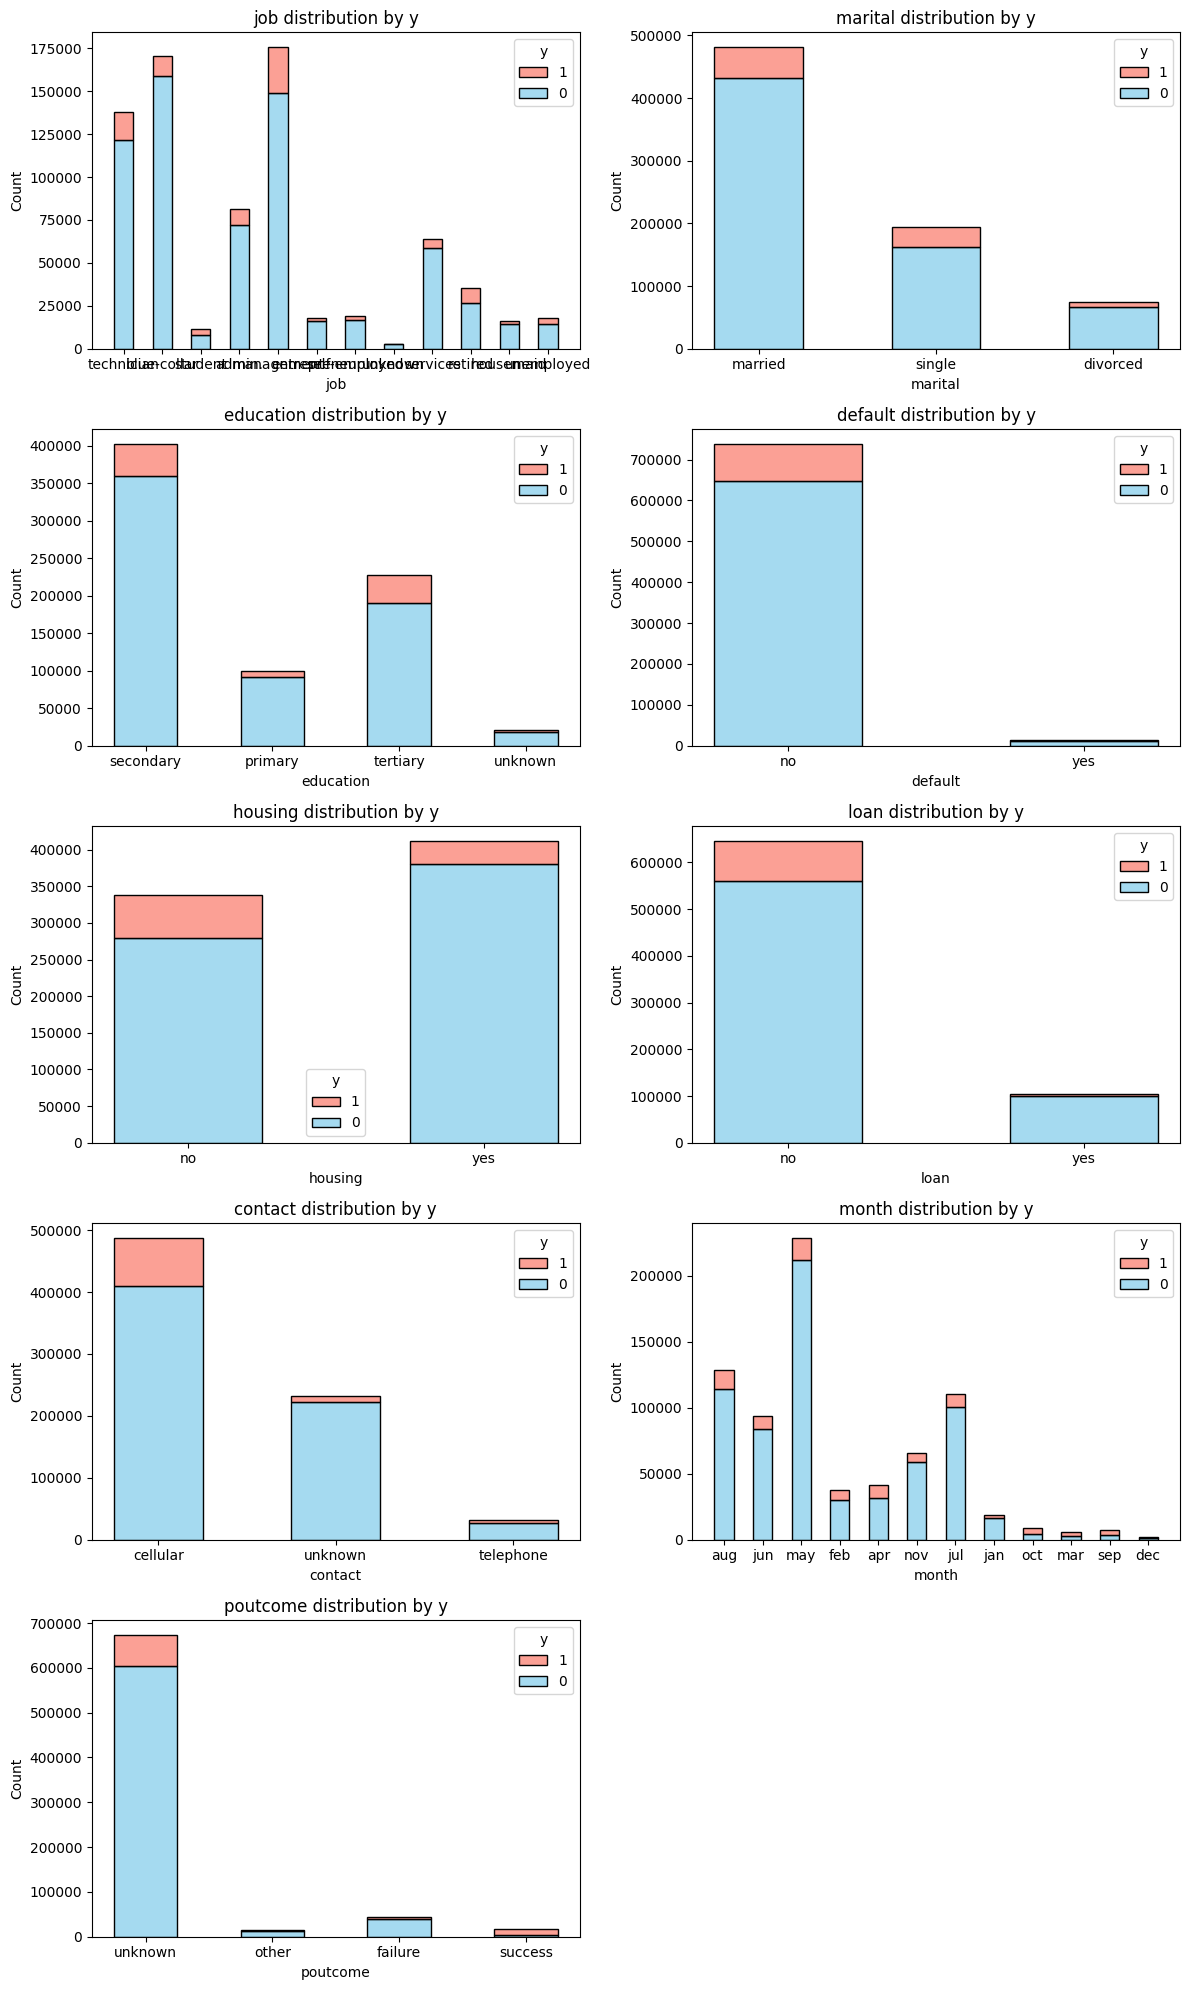

In [78]:
# stacked box plot of all categorical features with target feature
num_plots = len(categorical_columns)
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), squeeze=False)

axes = axes.flatten()
plot_idx = 0
for cat_cols in categorical_columns:
    sns.histplot(data=train_df, x=cat_cols, hue='y', hue_order=[1,0], palette=['salmon', 'skyblue'], multiple='stack', shrink=0.5, ax=axes[plot_idx])
    axes[plot_idx].set_title(f"{cat_cols} distribution by y")
    plt.xlabel("Feature")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plot_idx += 1

# remove empty subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Bar Plot
- comparing mean and median per class

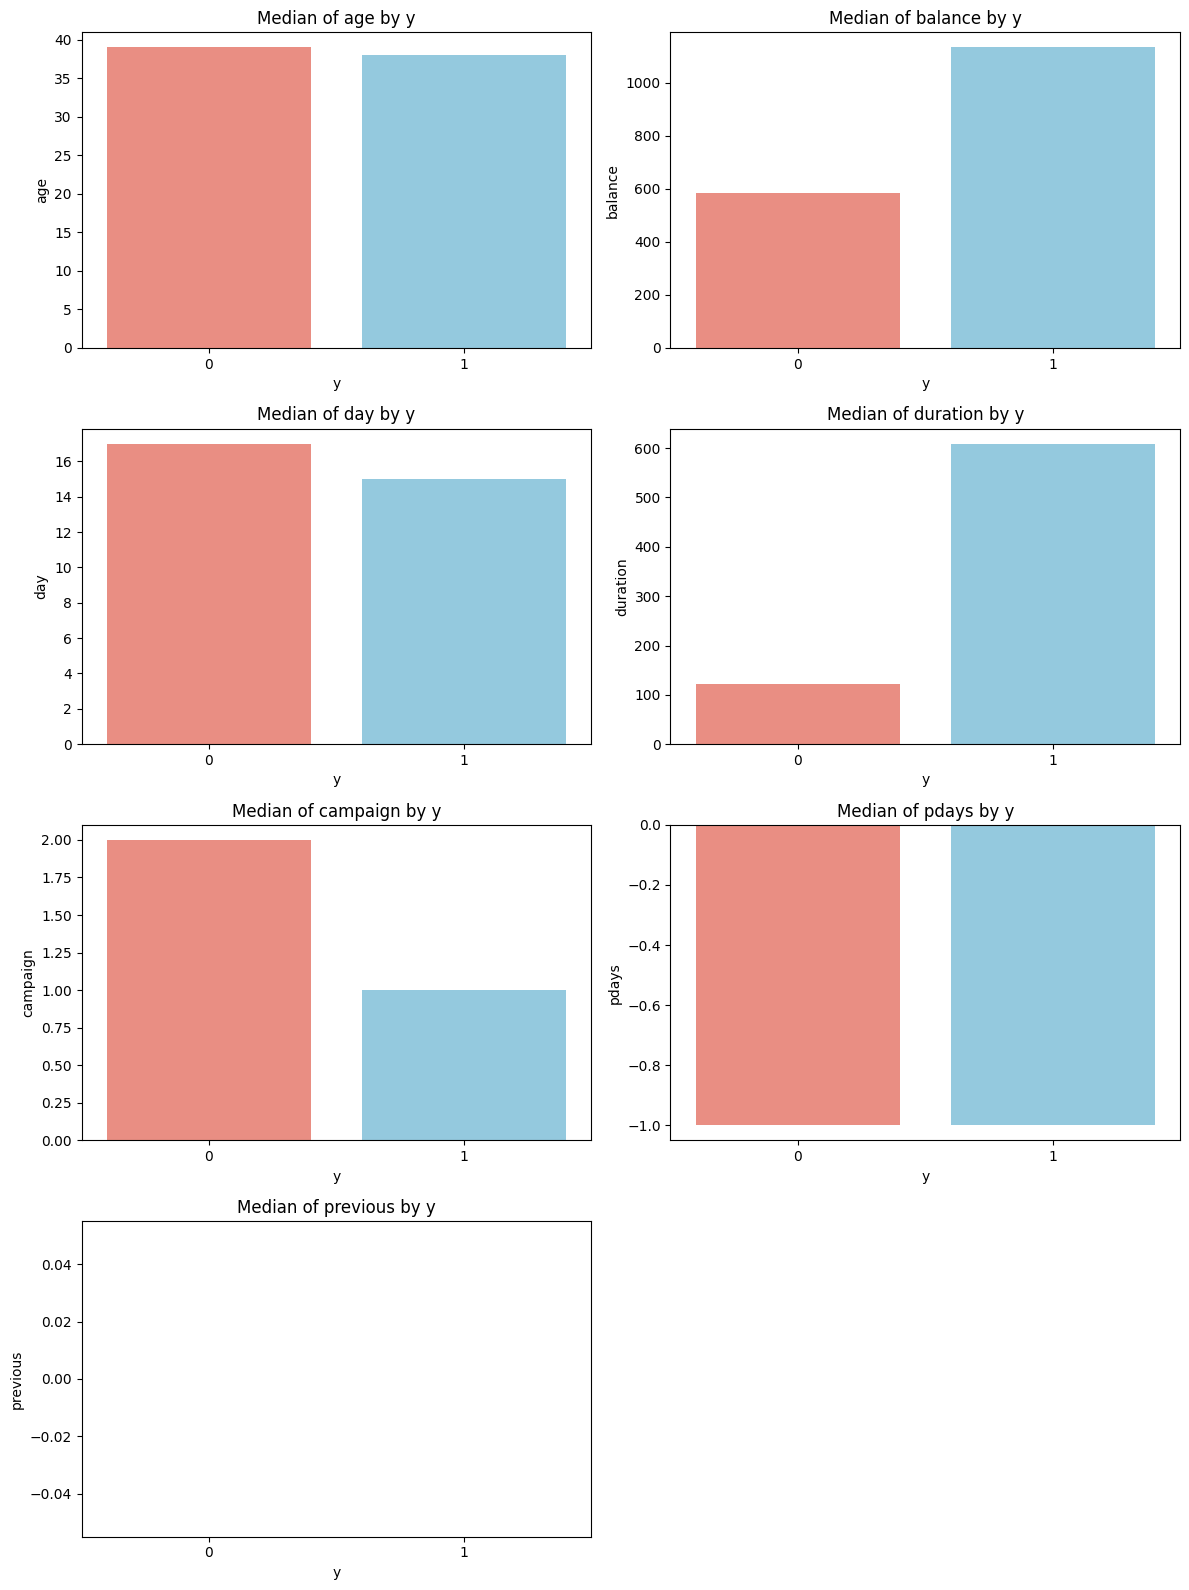

In [83]:
# bar plot analysis for comparing median per class
num_plots = len([col for col in numeric_columns if col != 'y'])
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), squeeze=False)

axes = axes.flatten()
plot_idx = 0
for num_cols in numeric_columns:
    if num_cols == 'y':
        continue
    sns.barplot(data=train_df, x='y', y=num_cols, estimator='median', ci=None, palette=['salmon', 'skyblue'], ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Median of {num_cols} by y")
    plot_idx += 1

# remove empty subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

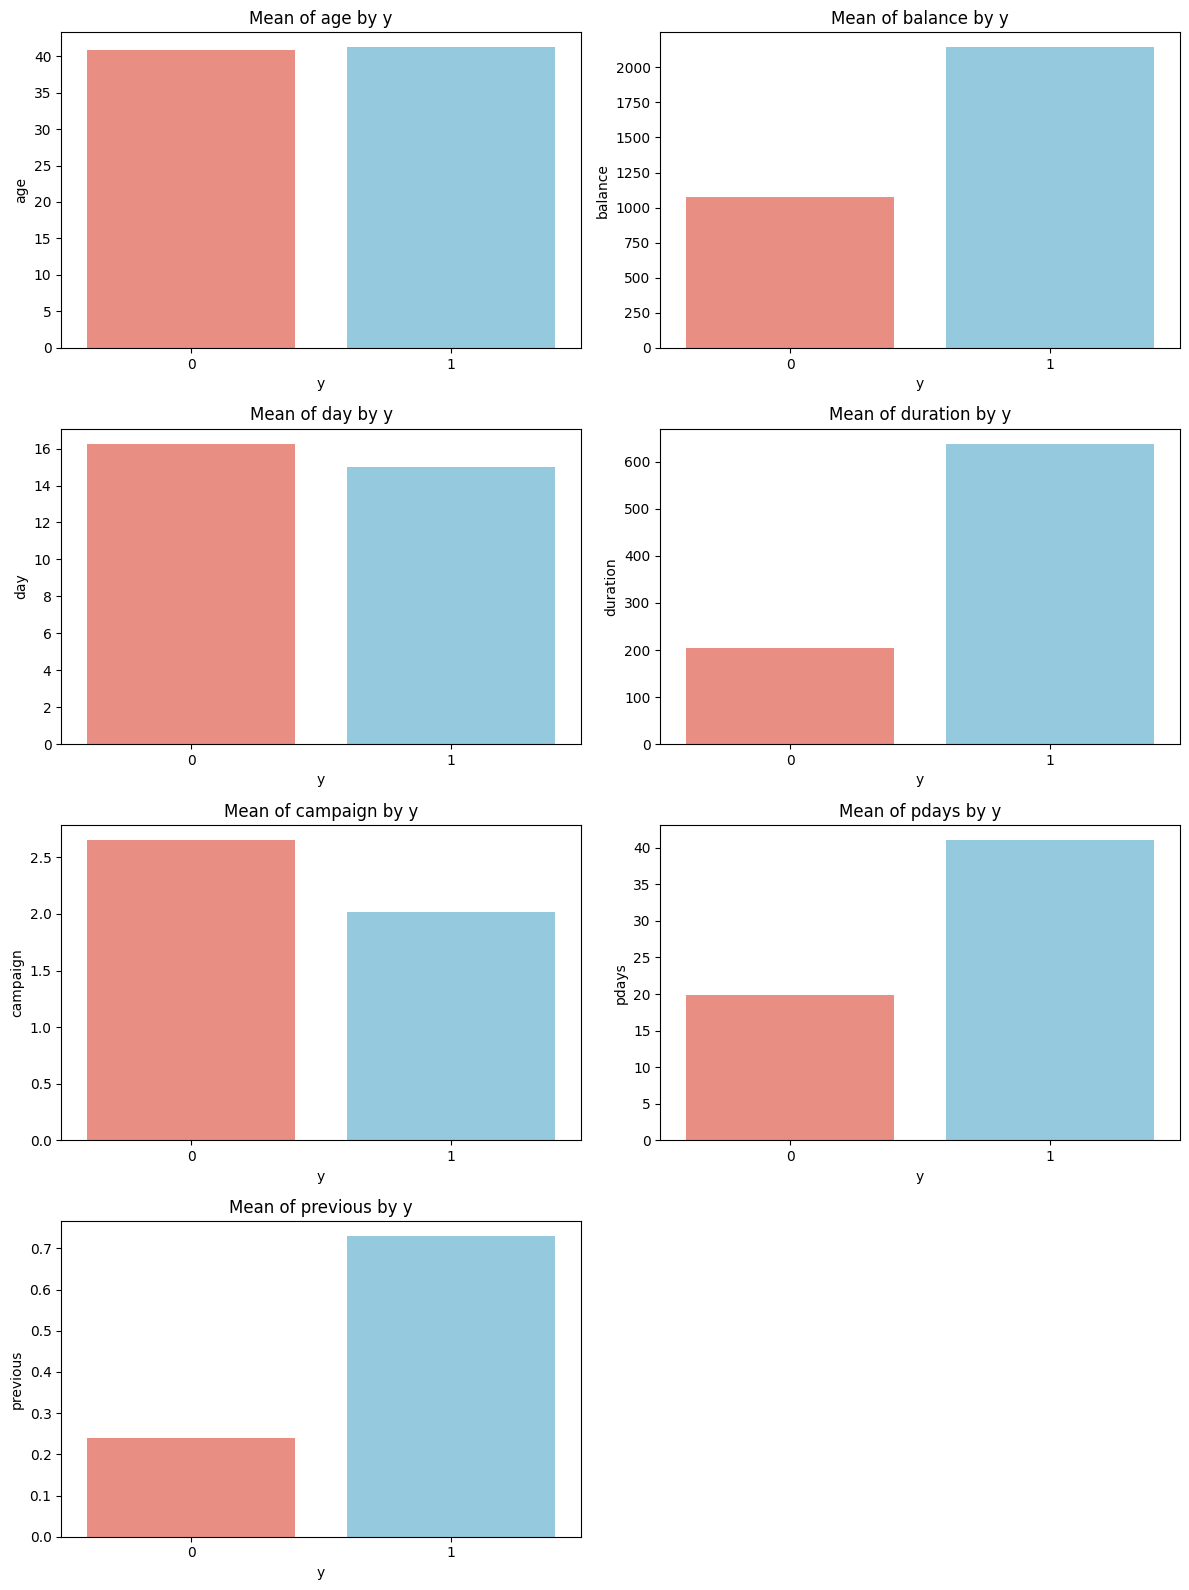

In [84]:
# bar plot analysis for comparing mean per class
num_plots = len([col for col in numeric_columns if col != 'y'])
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), squeeze=False)

axes = axes.flatten()
plot_idx = 0
for num_cols in numeric_columns:
    if num_cols == 'y':
        continue
    sns.barplot(data=train_df, x='y', y=num_cols, estimator='mean', ci=None, palette=['salmon', 'skyblue'], ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Mean of {num_cols} by y")
    plot_idx += 1

# remove empty subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Step 09: Correlation Analysis
- Correlation matrix for numeric features.
- Heatmap Visualization

               age   balance       day  duration  campaign     pdays  \
age       1.000000  0.062838 -0.015179 -0.004388  0.002052 -0.021635   
balance   0.062838  1.000000 -0.008269  0.109629 -0.027744  0.010040   
day      -0.015179 -0.008269  1.000000 -0.056755  0.178806 -0.086197   
duration -0.004388  0.109629 -0.056755  1.000000 -0.083016  0.047555   
campaign  0.002052 -0.027744  0.178806 -0.083016  1.000000 -0.061465   
pdays    -0.021635  0.010040 -0.086197  0.047555 -0.061465  1.000000   
previous  0.004541  0.033897 -0.051082  0.040105 -0.026707  0.561839   
y         0.009523  0.122513 -0.049625  0.519283 -0.075829  0.089277   

          previous         y  
age       0.004541  0.009523  
balance   0.033897  0.122513  
day      -0.051082 -0.049625  
duration  0.040105  0.519283  
campaign -0.026707 -0.075829  
pdays     0.561839  0.089277  
previous  1.000000  0.119552  
y         0.119552  1.000000  


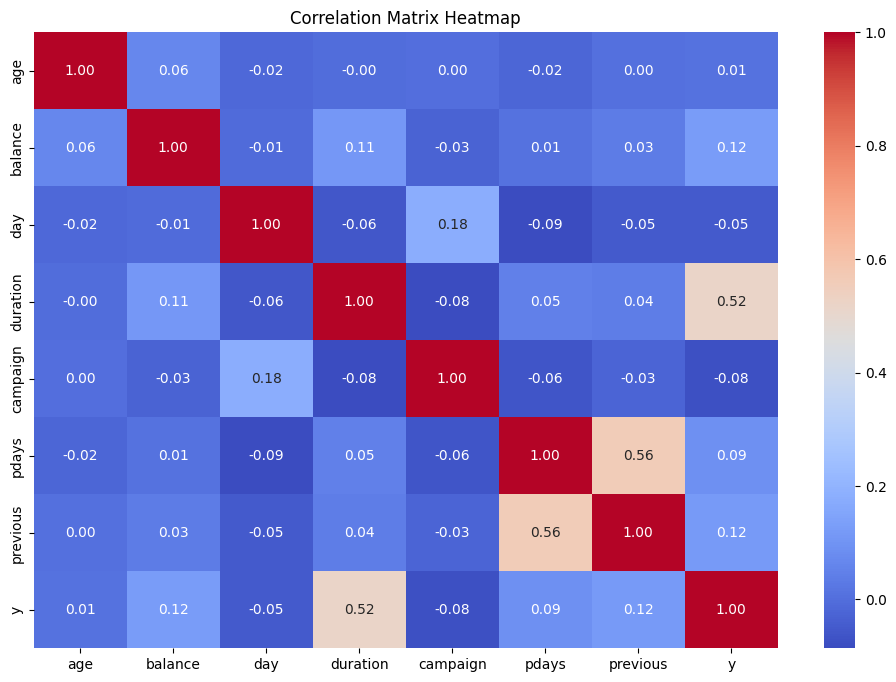

In [85]:
# Correlation analysis for numeric features
import numpy as np
corr_matrix = train_df[numeric_columns].corr()
print(corr_matrix)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Step 10: Outlier Detection
- Use boxplots or statistical methods to identify outliers in numeric columns.

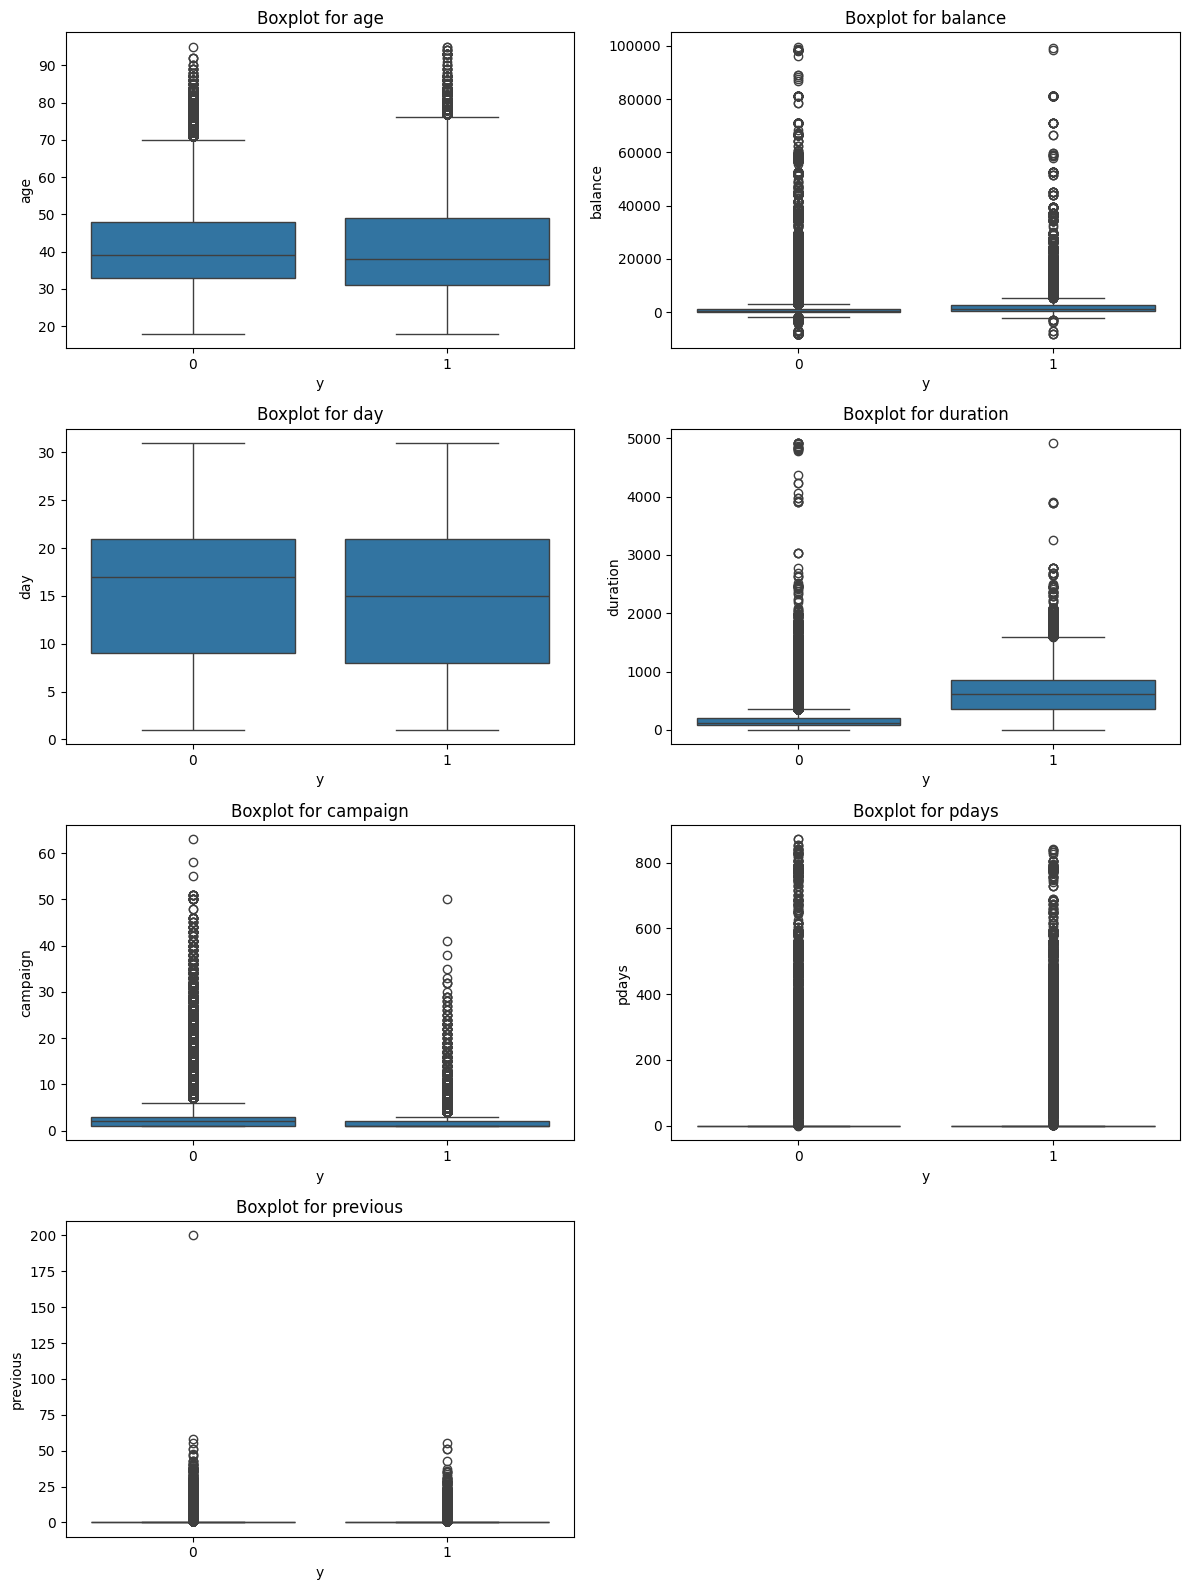

In [87]:
# Outlier detection using boxplots for numeric columns
num_plots = len([col for col in numeric_columns if col != 'y'])
n_cols = 2
n_rows = math.ceil(num_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), squeeze=False)

axes = axes.flatten()
plot_idx = 0
for num_cols in numeric_columns:
    if num_cols == 'y':
        continue
    sns.boxplot(data=train_df, x='y', y=num_cols, ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Boxplot for {num_cols}")
    plt.xlabel(num_cols)
    plot_idx += 1

# remove empty subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### More Information

In [88]:
# Unique values and cardinality
print('Unique values in categorical columns:')
for col in categorical_columns:
    print(f'{col}: {train_df[col].nunique()}')

print('\nUnique values in numeric columns:')
for col in numeric_columns:
    unique_vals = train_df[col].nunique()
    print(f'{col}: {unique_vals} (discrete)' if unique_vals < 20 else f'{col}: {unique_vals} (continuous)')

Unique values in categorical columns:
job: 12
marital: 3
education: 4
default: 2
housing: 2
loan: 2
contact: 3
month: 12
poutcome: 4

Unique values in numeric columns:
age: 78 (continuous)
balance: 8217 (continuous)
day: 31 (continuous)
duration: 1760 (continuous)
campaign: 52 (continuous)
pdays: 596 (continuous)
previous: 50 (continuous)
y: 2 (discrete)
